In [1]:
# My Packages
from modules.exact import trajectory
from modules.approximations import *
from modules.myconstants import *
from modules.converter import *

In [2]:
# Standard packages
import numpy as np
from matplotlib import pyplot as plt, patches

In [3]:
#Graph Parameters
plt.rcParams['figure.figsize'] = 12,8
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 15,
                     'legend.fontsize': 15})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 1.5

In [4]:
# Initializing lists and Arrays
alphaArray = np.arange(np.deg2rad(4), np.deg2rad(89.5), np.deg2rad(1))
sols = []
lList = []

# Converting alpha values to impact parameters
R = 2.5 # Surface Radius
for a in alphaArray:
    lList.append(alpha2l(a, R))

### Trajectory Computations
Takes a couple of seconds

In [5]:
for i in range(0, len(lList)):
    sols.append(trajectory(lList[i], R*r_G, False))

### Extracting $\Psi$

In [6]:
psi = [] # Angle at which the ray emerges
for i in range(0, len(sols)):
    psi.append(theta(sols[i][0][-1], sols[i][1][-1]))

### Plotting

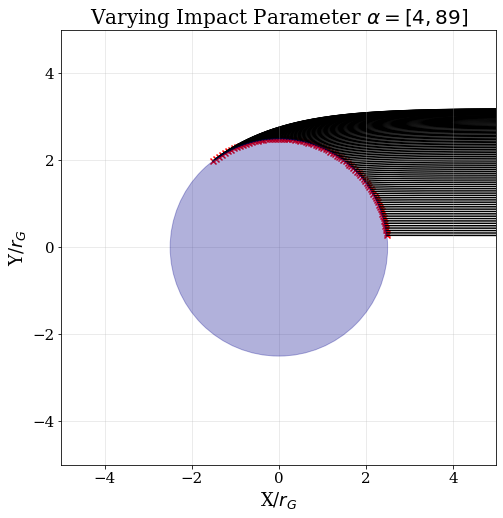

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting Event Horizon
# horizon = patches.Circle((0, 0), radius=1, color='black', zorder=150)
# ax.add_patch(horizon)

# # Plotting Neutron Star
surface = patches.Circle((0, 0), radius=R, color='darkblue', zorder=100, alpha=0.3)
ax.add_patch(surface)

ax.patch.set_visible(False)

# Plotting trajectories
for k in range(1, len(sols)):
    ax.plot(sols[k][0], sols[k][1], color='k', zorder=1)
    plt.scatter(sols[k][0][-1], sols[k][1][-1], marker='x', color='r', )

ax.set_xlabel(r"X/$r_G$")
ax.set_ylabel(r"Y/$r_G$")

lim = 5
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.title(r"Varying Impact Parameter $\alpha = [4, 89]$")
plt.grid(alpha=0.3)

plt.gca().set_aspect('equal')
plt.savefig('fig/VaryingImpactParameter.png')

### Corrections to Beloborodov

In [8]:
# Converting Alpha and Psi to degrees to make graphs more readable
alphaArrayDeg = np.rad2deg(alphaArray)
psiDeg = np.rad2deg(psi)

##############################
'''
Computing Beloborodov approximation and residues
'''
approxAlpha = psi2alpha(psi, R)
res = alphaArray - approxAlpha
erPer = (np.abs(res)/alphaArray)*100

#######################################
'''
Fitting through residues using SciPy
'''
from scipy.optimize import curve_fit

def func(psi, A, B):             #Exponential type fit
    return  A*np.exp(B*psi)

a, b = curve_fit(func, psi, res)[0]

def cor(psi):                    #Defining a correction function
    return func(psi, a, b)

fit = []
i = 0
while i<len(psi):               
    fit.append(cor(psi[i]))
    i+=1

#################################################    
'''
Computing corrected Beloborodov approximation
'''
resCorrected = alphaArray - (approxAlpha + fit)
erPerCorrected = (np.abs(resCorrected)/alphaArray)*100

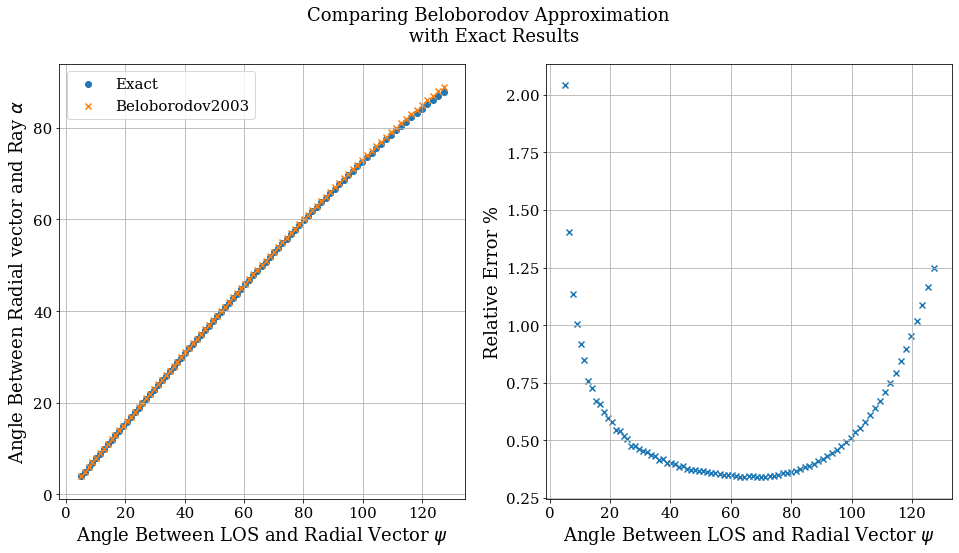

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
fig.suptitle("Comparing Beloborodov Approximation \n with Exact Results")

ax1.scatter(psiDeg, np.rad2deg(approxAlpha), label='Exact')
ax1.scatter(psiDeg, alphaArrayDeg, marker='x', label='Beloborodov2003')
ax1.set_xlabel(r'Angle Between LOS and Radial Vector $\psi$')
ax1.set_ylabel(r'Angle Between Radial vector and Ray $\alpha$')
ax1.grid()
ax1.legend()

ax2.scatter(psiDeg, erPer, marker='x', label='Beloborodov2003')
ax2.set_xlabel(r'Angle Between LOS and Radial Vector $\psi$')
ax2.set_ylabel(r'Relative Error %')
ax2.grid()
plt.savefig('fig/BeloApprox.png')

Text(0.5, 1.0, 'Fitting through Residues')

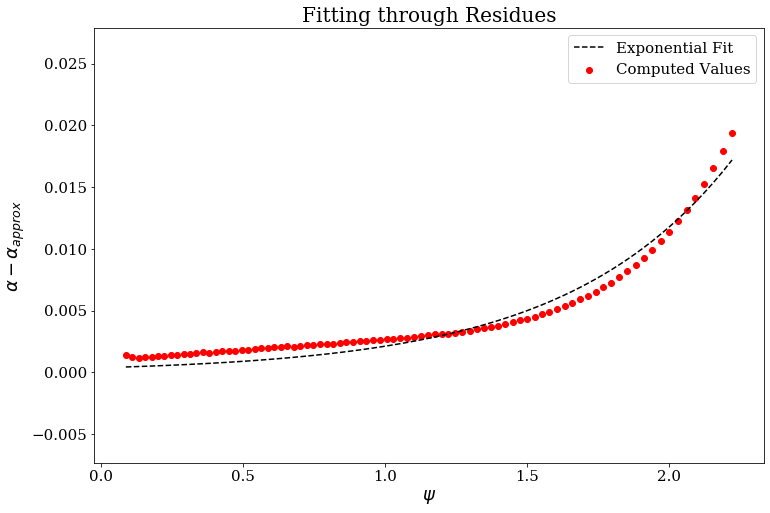

In [10]:
plt.scatter(psi, res, color='r', label='Computed Values')
plt.plot(psi, fit, 'k--', label='Exponential Fit')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$\alpha - \alpha_{approx}$')
plt.legend() 
plt.title('Fitting through Residues')

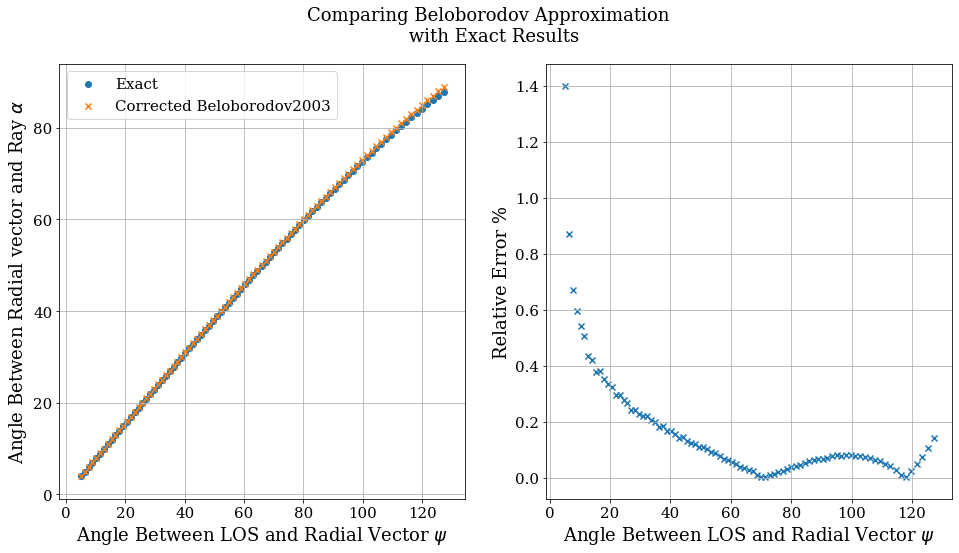

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
fig.suptitle("Comparing Beloborodov Approximation \n with Exact Results")

ax1.scatter(psiDeg, np.rad2deg(approxAlpha), label='Exact')
ax1.scatter(psiDeg, alphaArrayDeg, marker='x', label='Corrected Beloborodov2003')
ax1.set_xlabel(r'Angle Between LOS and Radial Vector $\psi$')
ax1.set_ylabel(r'Angle Between Radial vector and Ray $\alpha$')
ax1.grid()
ax1.legend()

ax2.scatter(psiDeg, erPerCorrected, marker='x', label='Beloborodov2003')
ax2.set_xlabel(r'Angle Between LOS and Radial Vector $\psi$')
ax2.set_ylabel(r'Relative Error %')
ax2.grid()
plt.savefig('fig/BeloApproxCorrected.png')